# Thyroid Cancer Risk Prediction

### Load dataset 

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [34]:
df = pd.read_csv('thyroid_cancer_risk_data.csv')

In [35]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


### Testing Visuals

In [80]:
sns.set_style('darkgrid')

In [81]:
df.groupby('Diagnosis').Nodule_Size.describe()

,count,mean,std,min,25%,50%,75%,max
Diagnosis,,,,,,,,
Benign,163196.0,2.505518,1.444528,0.0,1.25,2.52,3.76,5.0
Malignant,49495.0,2.496432,1.444962,0.0,1.24,2.50,3.75,5.0


In [82]:
cancer = (
    df
    .groupby('Diagnosis')
    .TSH_Level
    .value_counts()
    .unstack()
    .fillna(0)
)

<Axes: xlabel='TSH_Level', ylabel='Diagnosis'>

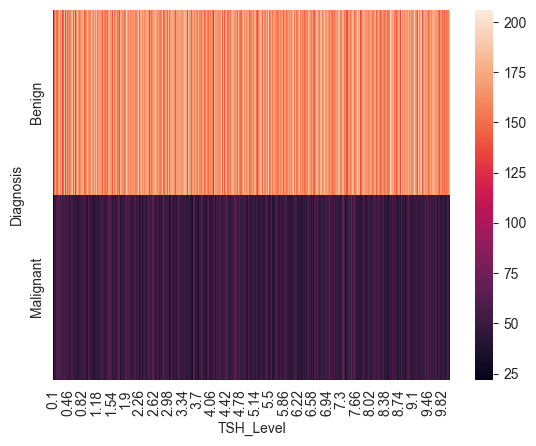

In [83]:
sns.heatmap(cancer)

<Axes: xlabel='Country', ylabel='count'>

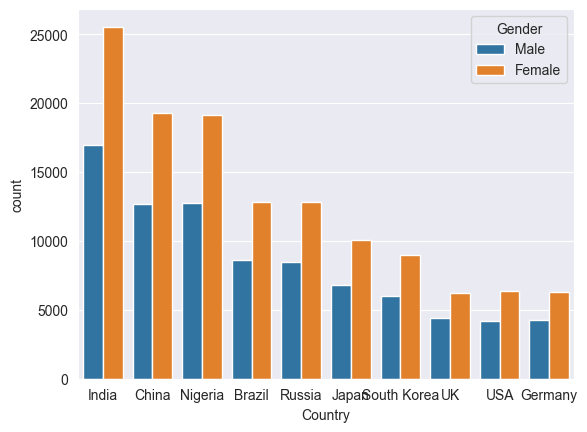

In [84]:
sns.countplot(x = 'Country', data = df, hue="Gender", order=df.Country.value_counts().index)

<Axes: xlabel='Ethnicity', ylabel='count'>

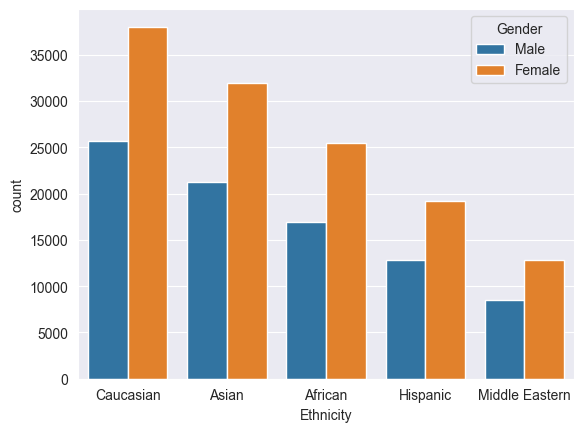

In [85]:
sns.countplot(x = 'Ethnicity', hue='Gender', data = df, order=df.Ethnicity.value_counts().index)

<Axes: xlabel='Diagnosis', ylabel='count'>

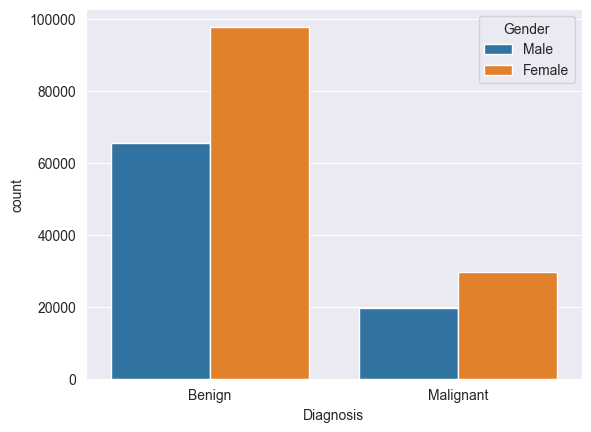

In [86]:
sns.countplot(x = 'Diagnosis', hue='Gender', data = df, order=df.Diagnosis.value_counts().index)

<Axes: xlabel='Nodule_Size', ylabel='TSH_Level'>

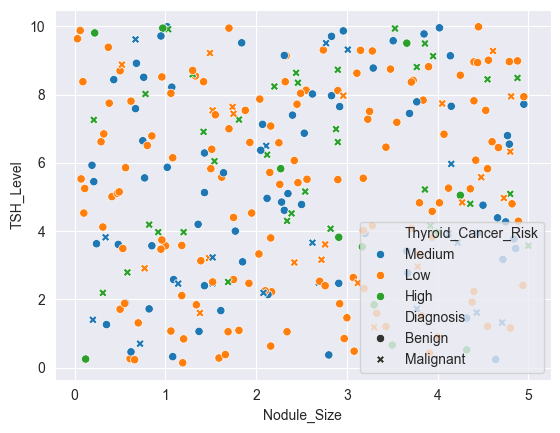

In [136]:
scater_df = df.sample(n = 300, random_state=22)
sns.scatterplot(x='Nodule_Size', y='TSH_Level', hue ='Thyroid_Cancer_Risk', style= 'Diagnosis' ,data = scater_df)

In [59]:
df.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Country                 object
Ethnicity               object
Family_History          object
Radiation_Exposure      object
Iodine_Deficiency       object
Smoking                 object
Obesity                 object
Diabetes                object
TSH_Level              float64
T3_Level               float64
T4_Level               float64
Nodule_Size            float64
Thyroid_Cancer_Risk     object
Diagnosis               object
dtype: object

In [ ]:
print("------ df.shape---------")
print(df.shape)

print("------ df.head---------")
print(df.head())

print("----- df.describe--------")
print(df.describe())

print("----- check for null values -----------")
print(df.isnull().sum())

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 2: Drop irrelevant columns
df = df.drop(columns=['Patient_ID'])  # Not useful for ML

# Step 3: Standardize object (categorical) columns
# Convert to lowercase and strip spaces for consistency
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()

# Optional: Check for unique values per categorical column
# print({col: df[col].unique() for col in df.select_dtypes(include='object').columns})

# Step 4: Encode categorical features
# Label encode binary features or use one-hot encoding for others

# Binary Label Encoding
binary_cols = ['Gender', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 
                'Smoking', 'Obesity', 'Diabetes']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for multi-category features
df = pd.get_dummies(df, columns=['Country', 'Ethnicity', 'Thyroid_Cancer_Risk', 'Diagnosis'], drop_first=True)

# Step 5: Resulting cleaned dataframe
print(df.head())


   Age  Gender  Family_History  Radiation_Exposure  Iodine_Deficiency  \
0   66       1               0                   1                  0   
1   29       1               0                   1                  0   
2   86       1               0                   0                  0   
3   75       0               0                   0                  0   
4   35       0               1                   1                  0   

   Smoking  Obesity  Diabetes  TSH_Level  T3_Level  ...  Country_south korea  \
0        0        0         0       9.37      1.67  ...                False   
1        0        0         0       1.83      1.73  ...                False   
2        0        0         0       6.26      2.59  ...                False   
3        0        0         0       4.10      2.62  ...                False   
4        0        0         0       9.10      2.11  ...                False   

   Country_uk  Country_usa  Ethnicity_asian  Ethnicity_caucasian  \
0       Fals

In [5]:
X = df.iloc[:, -1]
y = df.iloc[:, -1]

print(f"feature shape: {X.shape}")
print(f"label shape: {y.shape}")

feature shape: (212691,)
label shape: (212691,)


In [13]:
df.corr()

,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,...,Country_south korea,Country_uk,Country_usa,Ethnicity_asian,Ethnicity_caucasian,Ethnicity_hispanic,Ethnicity_middle eastern,Thyroid_Cancer_Risk_low,Thyroid_Cancer_Risk_medium,Diagnosis_malignant
Age,1.000000,-0.000151,0.003337,0.004007,-0.002368,-0.000435,0.002233,-0.002590,-0.000925,-0.001013,...,-0.000738,-0.000497,0.000639,-0.001353,0.001327,-0.000512,-0.001869,-0.003043,0.001418,0.000115
Gender,-0.000151,1.000000,-0.002121,-0.000649,-0.002840,-0.003239,-0.001941,-0.000641,-0.000102,-0.003066,...,0.000632,0.006374,-0.000289,-0.000517,0.002937,-0.000966,0.000230,0.003784,-0.000584,-0.001439
Family_History,0.003337,-0.002121,1.000000,-0.000795,0.000550,-0.000406,0.000915,-0.000422,0.005014,0.001324,...,-0.001634,0.000212,-0.001477,0.000740,0.000806,0.001226,0.000844,-0.130918,-0.092536,0.140921
Radiation_Exposure,0.004007,-0.000649,-0.000795,1.000000,0.002381,0.001947,-0.002236,0.000158,0.000210,-0.003249,...,0.000892,0.000356,-0.002580,-0.002683,-0.001475,0.000655,0.003032,-0.079562,-0.057614,0.089043
Iodine_Deficiency,-0.002368,-0.002840,0.000550,0.002381,1.000000,0.001282,0.000592,-0.001800,-0.000824,0.000024,...,0.003044,0.003601,-0.001192,-0.000640,0.003253,-0.000751,0.001909,-0.092620,-0.065240,0.099032
Smoking,-0.000435,-0.003239,-0.000406,0.001947,0.001282,1.000000,-0.001899,-0.000151,-0.000869,0.001163,...,-0.000205,-0.001945,0.000797,0.004254,0.000752,-0.003332,0.000891,0.002519,-0.002769,0.000862
Obesity,0.002233,-0.001941,0.000915,-0.002236,0.000592,-0.001899,1.000000,0.000854,0.001318,-0.001064,...,0.000199,-0.001954,0.001166,-0.001302,0.001584,-0.000041,0.002137,0.001344,0.000957,-0.001233
Diabetes,-0.002590,-0.000641,-0.000422,0.000158,-0.001800,-0.000151,0.000854,1.000000,0.001751,0.001787,...,0.001247,0.000962,-0.000504,-0.000242,-0.001108,-0.000514,0.002523,0.001891,-0.002421,-0.003218
TSH_Level,-0.000925,-0.000102,0.005014,0.000210,-0.000824,-0.000869,0.001318,0.001751,1.000000,0.000335,...,-0.001220,0.001241,0.000376,-0.000581,-0.001322,0.000857,0.000825,-0.001721,-0.000201,-0.002670
T3_Level,-0.001013,-0.003066,0.001324,-0.003249,0.000024,0.001163,-0.001064,0.001787,0.000335,1.000000,...,-0.002473,-0.000504,0.001239,-0.001842,0.001433,0.000223,-0.001588,-0.001277,0.003230,-0.002388


<Axes: >

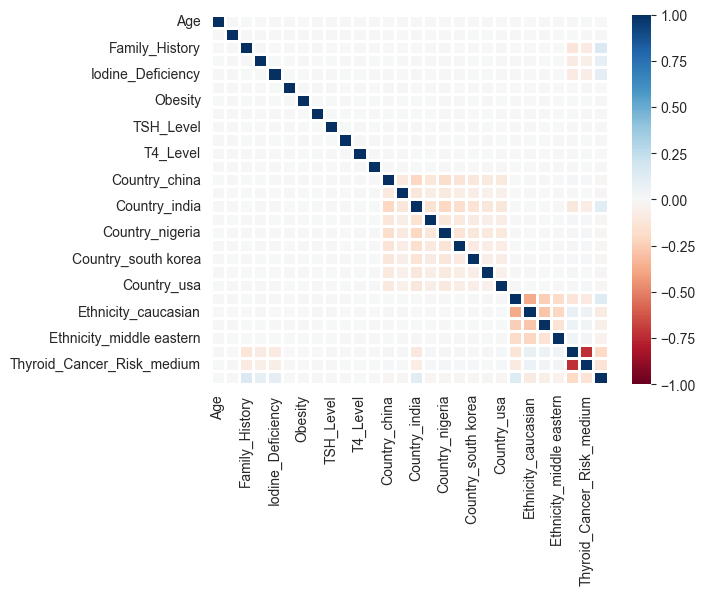

In [27]:
sns.heatmap(df.corr(), cmap="RdBu", center=0, vmin=-1, vmax=1,linewidths=1)